In [35]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import mysql.connector

In [37]:
#dataset imported from data.gov as csv file

In [38]:
vehicle_data=pd.read_csv("/Users/abinbi/Downloads/Electric_Vehicle_Population_Data.csv",) #delimiter is used to read the seperation like comas
vehicle_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [39]:
print(vehicle_data.describe())

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  191403.000000  191407.000000   191407.000000  191407.000000   
mean    98177.823603    2020.732335       55.657442     994.773258   
std      2392.808886       2.990487       90.151930    8050.523372   
min      1731.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98371.000000    2023.000000       72.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         190993.000000    1.914070e+05       1.914030e+05  
mean              29.016880    2.237202e+08       5.297759e+10  
std               14.909417    7.398058e+07       1.573588e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.000000    1.861622e+08 

In [40]:
datasetsize=vehicle_data.shape
datasetsize

(191407, 17)

In [41]:
datatype=vehicle_data.dtypes
datatype

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [42]:
missingvalues = vehicle_data.isnull().sum()
print(missingvalues)

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64


In [43]:
uniquevaluescounts = vehicle_data['County'].value_counts()
print(uniquevaluescounts)

County
King          99076
Snohomish     22643
Pierce        14932
Clark         11335
Thurston       6969
              ...  
New York          1
Miami-Dade        1
Mobile            1
Beaufort          1
Pitt              1
Name: count, Length: 197, dtype: int64


In [44]:
meanvalue = vehicle_data['Electric Range'].mean()
medianvalue = vehicle_data['Electric Range'].median()
stddeviation = vehicle_data['Electric Range'].std()

print("Mean:", meanvalue)
print("Median:", medianvalue)
print("Standard Deviation:", stddeviation)

Mean: 55.65744199532932
Median: 0.0
Standard Deviation: 90.15192984184792


In [45]:
numericalcolumn = vehicle_data['Electric Range']

Q1 = numericalcolumn.quantile(0.25)
Q3 = numericalcolumn.quantile(0.75)
IQR = Q3 - Q1

lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

potentialoutliers = numericalcolumn[(numericalcolumn < lowerbound) | (numericalcolumn > upperbound)]
print("Potential Outliers:")
print(potentialoutliers)

Potential Outliers:
0         270
3         208
5         220
6         215
8         210
         ... 
191394    291
191395    291
191398    208
191399    215
191402    220
Name: Electric Range, Length: 32894, dtype: int64


In [49]:
numerical_data = vehicle_data.select_dtypes(include=['number'])
numerical_data.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98112.0,2019,270,0,43.0,202233958,5.303301e+10
1,98953.0,2024,20,0,15.0,264425178,5.307700e+10
2,98031.0,2015,84,0,11.0,114962025,5.303303e+10
3,98012.0,2015,208,0,1.0,232724670,5.306105e+10
4,98908.0,2022,42,0,14.0,221023589,5.307700e+10


In [53]:
correlationmatrix=numerical_data.corr()
correlationmatrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.001232,-0.003008,-0.001316,-0.409859,0.006430,0.484481
Model Year,-0.001232,1.000000,-0.491698,-0.230325,-0.017281,0.166556,0.005767
Electric Range,-0.003008,-0.491698,1.000000,0.110358,0.020369,-0.113483,-0.002330
Base MSRP,-0.001316,-0.230325,0.110358,1.000000,0.011660,-0.031628,0.002762
Legislative District,-0.409859,-0.017281,0.020369,0.011660,1.000000,-0.010663,-0.101400
DOL Vehicle ID,0.006430,0.166556,-0.113483,-0.031628,-0.010663,1.000000,0.004567
2020 Census Tract,0.484481,0.005767,-0.002330,0.002762,-0.101400,0.004567,1.000000


In [47]:
groupeddata = vehicle_data.groupby('Make')[['Electric Range']].agg(['mean', 'sum'])
print(groupeddata)

                     Electric Range         
                               mean      sum
Make                                        
ACURA                      0.000000        0
ALFA ROMEO                33.000000     1848
AUDI                      47.332905   184125
AZURE DYNAMICS            56.000000      448
BENTLEY                   19.666667       59
BMW                       33.215063   265488
CADILLAC                   5.831522     3219
CHEVROLET                 94.139585  1348173
CHRYSLER                  32.188918   109217
DODGE                     32.000000    19808
FIAT                      85.628681    66876
FISKER                     2.005525      363
FORD                       9.966063   100139
GENESIS                    0.000000        0
GMC                        0.000000        0
HONDA                     45.569428    39053
HYUNDAI                   18.363874    91397
JAGUAR                   204.000000    47736
JEEP                      22.339071   111606
KIA       

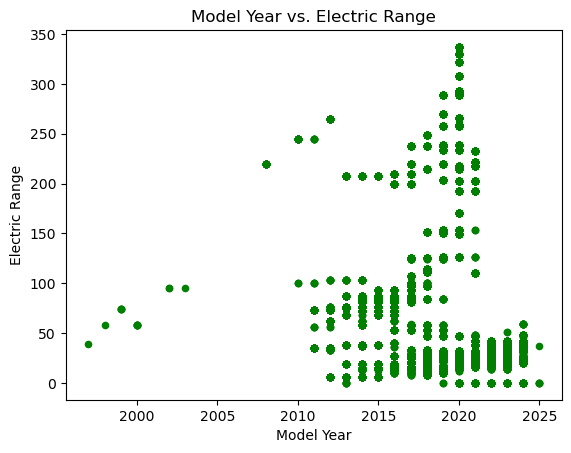

<Figure size 1000x600 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

vehicle_data.plot.scatter(x='Model Year', y='Electric Range', color='green')  # Specify the x and y variables for the scatter plot
plt.title('Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.figure(figsize=(10, 6))
plt.show()